# Hotel Booking Data


---
**Objective:**

In this notebook, we are going to create some visualizations to better explore our dataset and clean it as a next step.

## Dataset Explanation
- **hotelHotel:** (H1 = Resort Hotel or H2 = City Hotel)
- **is_canceled:** Value indicating if the booking was canceled (1) or not (0)
- **lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year:** Year of arrival date
- **arrival_date_month:** Month of arrival date
- **arrival_date_week_number:** Week number of year for arrival date
- **arrival_date_day_of_month:** Day of arrival date
- **stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults:** Number of adults
- **children:** Number of children
- **babies:** Number of babies
- **meal:** Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country:** Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment:** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **distribution_channel:** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_gues:t** Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations:**  Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled:** Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type:** Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type:** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes:**  Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type:** Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent:** ID of the travel agency that made the booking
- **company:** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **days_in_waiting_list:** Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type:** Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr:** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking_spaces:** Number of car parking spaces required by the customer
- **total_of_special_requests:** Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status:** Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date:** Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking canceled or when did the customer checked-out of the hotel

# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

After you download the **hotel_bookings.csv** dataset file, upload it to your runtime so you can work with it.

In [5]:
df= pd.read_csv('hotel_bookings.csv')



# 1. Exploring your data / Diagnosis phase

## 1.1 Question 1: Diagnose data for cleaning

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- .head() returns the first few rows (the “head” of the DataFrame).
- .tail() returns the last few rows (the “tail” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .columns: An index of columns: the column names.


In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [7]:
df.tail()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
103780,City Hotel,0.0,20.0,2016.0,December,53.0,28.0,0.0,4.0,1.0,...,No Deposit,9.0,NaN,0.0,Transient,131.35,0.0,1.0,Check-Out,2017-01-01
103781,City Hotel,0.0,20.0,2016.0,December,53.0,28.0,0.0,4.0,2.0,...,No Deposit,9.0,NaN,0.0,Transient,131.35,0.0,1.0,Check-Out,2017-01-01
103782,City Hotel,0.0,17.0,2016.0,December,53.0,31.0,0.0,1.0,2.0,...,No Deposit,27.0,132.0,0.0,Transient,80.00,0.0,0.0,Check-Out,2017-01-01
103783,City Hotel,0.0,39.0,2016.0,December,53.0,28.0,0.0,4.0,2.0,...,No Deposit,9.0,NaN,0.0,Transient,115.60,0.0,1.0,Check-Out,2017-01-01
103784,City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103785 entries, 0 to 103784
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103785 non-null  object 
 1   is_canceled                     103784 non-null  float64
 2   lead_time                       103784 non-null  float64
 3   arrival_date_year               103784 non-null  float64
 4   arrival_date_month              103784 non-null  object 
 5   arrival_date_week_number        103784 non-null  float64
 6   arrival_date_day_of_month       103784 non-null  float64
 7   stays_in_weekend_nights         103784 non-null  float64
 8   stays_in_week_nights            103784 non-null  float64
 9   adults                          103784 non-null  float64
 10  children                        103780 non-null  float64
 11  babies                          103784 non-null  float64
 12  meal            

In [9]:
df.shape


(103785, 32)

In [10]:
df.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

- Missing values in agent, children, country and company columns (We can see that from the non null count)

## 1.2 Exploratory data analysis

### Question 2: Check for missing Values

 Missing data can affect your analysis and models. Determine if any columns have missing values and decide how to handle them.

In [11]:

   # Count of missing values in each column
print(df.isnull().sum())

hotel                                 0
is_canceled                           1
lead_time                             1
arrival_date_year                     1
arrival_date_month                    1
arrival_date_week_number              1
arrival_date_day_of_month             1
stays_in_weekend_nights               1
stays_in_week_nights                  1
adults                                1
children                              5
babies                                1
meal                                  1
country                             489
market_segment                        1
distribution_channel                  1
is_repeated_guest                     1
previous_cancellations                1
previous_bookings_not_canceled        1
reserved_room_type                    1
assigned_room_type                    1
booking_changes                       1
deposit_type                          1
agent                             14919
company                           97612


### Question 3: Explore descriptive statistics

In [13]:
 # Summary statistics for numerical columns
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  103784.000000  103784.000000      103784.000000   
mean        0.425971     104.963241        2016.031614   
std         0.494492     107.564158           0.674165   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     163.000000        2016.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             103784.000000              103784.000000   
mean                  28.335688                  15.776998   
std                   13.675549                   8.774088   
min                    1.000000                   1.000000   
25%                   17.000000                   8.000000   
50%                   29.000000                  16.000000   
75%                   40.000000            

### Question 4: Data Visualization

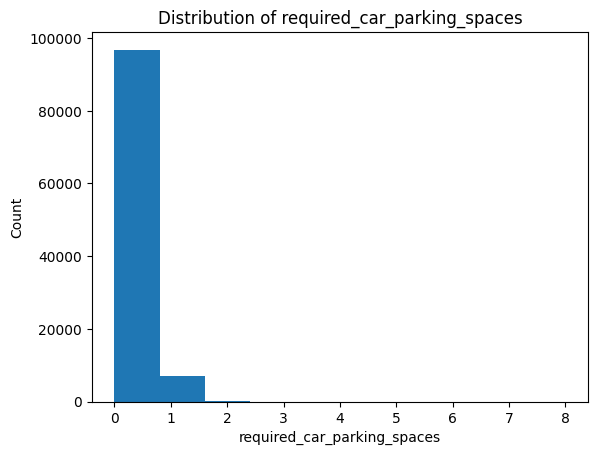

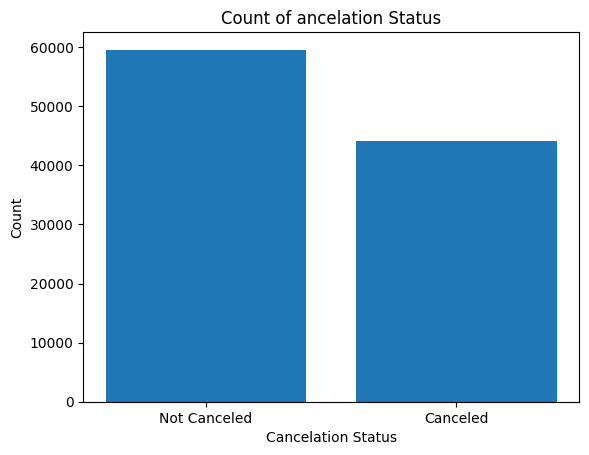

In [14]:
import matplotlib.pyplot as plt

# Histogram for "required_car_parking_spaces" column
plt.hist(df['required_car_parking_spaces'], bins=10)
plt.xlabel('required_car_parking_spaces')
plt.ylabel('Count')
plt.title('Distribution of required_car_parking_spaces')
plt.show()

# Bar plot for "is_canceled" column

cancel_counts = df['is_canceled'].value_counts()
cancel_labels = ['Not Canceled', 'Canceled']
plt.bar(cancel_labels, cancel_counts)
plt.xlabel('Cancelation Status')
plt.ylabel('Count')
plt.title('Count of ancelation Status')
plt.show()


## 1.3 Cleaning

### Question 5: Handling Missing Values

In [15]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Option 1: Remove rows with missing values
df_copy_dropped = df_copy.dropna()

# Option 2: Impute missing values
# Fill missing values with a specific value
df_copy_filled = df_copy.fillna(0)

# Fill missing values with the mean value of the column
df_copy_mean = df_copy.fillna(df_copy.mean())

# Option 3: Drop columns with excessive missing data
# Set a threshold for the percentage of missing values in a column
threshold = 0.5  # Example threshold of 50%
df_copy_dropped_cols = df_copy.dropna(thresh=threshold*len(df_copy), axis=1)

# Print the modified DataFrames
print("DataFrame with dropped rows:\n", df_copy_dropped)
print("DataFrame with filled missing values:\n", df_copy_filled)
print("DataFrame with filled missing values using mean:\n", df_copy_mean)


<ipython-input-15-41fbff992a12>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy_mean = df_copy.fillna(df_copy.mean())


DataFrame with dropped rows:
                hotel  is_canceled  lead_time  arrival_date_year  \
2392    Resort Hotel          0.0        6.0             2015.0   
2697    Resort Hotel          0.0       24.0             2015.0   
2867    Resort Hotel          0.0       24.0             2015.0   
2877    Resort Hotel          0.0       24.0             2015.0   
2878    Resort Hotel          0.0       24.0             2015.0   
...              ...          ...        ...                ...   
99998     City Hotel          0.0      256.0             2016.0   
99999     City Hotel          0.0      256.0             2016.0   
101284    City Hotel          0.0       27.0             2016.0   
102557    City Hotel          0.0       11.0             2016.0   
103782    City Hotel          0.0       17.0             2016.0   

       arrival_date_month  arrival_date_week_number  \
2392              October                      42.0   
2697              October                      44.0   


### Data Types

Check Unique Values for df column to know whether column type is correct or not

In [16]:
for i in df.columns:
    x = df[i].value_counts()
    print("Column name ",i," has different values of:",len(x))

Column name  hotel  has different values of: 3
Column name  is_canceled  has different values of: 2
Column name  lead_time  has different values of: 478
Column name  arrival_date_year  has different values of: 3
Column name  arrival_date_month  has different values of: 12
Column name  arrival_date_week_number  has different values of: 53
Column name  arrival_date_day_of_month  has different values of: 31
Column name  stays_in_weekend_nights  has different values of: 17
Column name  stays_in_week_nights  has different values of: 35
Column name  adults  has different values of: 14
Column name  children  has different values of: 5
Column name  babies  has different values of: 5
Column name  meal  has different values of: 5
Column name  country  has different values of: 168
Column name  market_segment  has different values of: 8
Column name  distribution_channel  has different values of: 5
Column name  is_repeated_guest  has different values of: 2
Column name  previous_cancellations  has d

According to the unqiue values per each column the following columns should be change to
1. **categorical columns:**   mealType, country,market_segment,distribution_channel,reserved_room_type, assigned_room_type, customer_type,reservation_status,arrival_date_month, hotel, arrival_date_year
2. **boolean:** is_canceled, is_repeated_guest
3. **int:** children, agent, company, ...
4. **date:** reservation_status_date

After knowing which columns represent categorical data, let's see the counts of each value in these columns

In [17]:
df_cat=df[['hotel','is_canceled','arrival_date_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status']]

for i in df_cat.columns:
    x = df_cat[i].value_counts()
    print("Column name is:",i,"and its value counts are:")
    print(x)
    print()

Column name is: hotel and its value counts are:
City Hotel      63724
Resort Hotel    40060
City                1
Name: hotel, dtype: int64

Column name is: is_canceled and its value counts are:
0.0    59575
1.0    44209
Name: is_canceled, dtype: int64

Column name is: arrival_date_month and its value counts are:
August       11902
October      11160
September    10508
July         10465
May           9524
April         9118
June          8834
March         7715
November      6794
December      6584
February      6496
January       4684
Name: arrival_date_month, dtype: int64

Column name is: meal and its value counts are:
BB           80989
HB           13290
SC            7539
Undefined     1169
FB             797
Name: meal, dtype: int64

Column name is: country and its value counts are:
PRT    46494
GBR    10304
FRA     7901
ESP     7640
DEU     5325
       ...  
STP        1
KNA        1
HND        1
NIC        1
ATA        1
Name: country, Length: 168, dtype: int64

Column name is

The *category data type* in Python will continue to look like a string character to us and in many places will behave like a string (or object) type; however, it is internally being represented by integer values, unique to each category.

Question 6: Here's how we change to the category dtype

In [18]:
for col in df_cat.columns:
  df_cat[col] = df_cat[col].astype('category')

<ipython-input-18-81fdee3bd4fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = df_cat[col].astype('category')
<ipython-input-18-81fdee3bd4fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = df_cat[col].astype('category')
<ipython-input-18-81fdee3bd4fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Below, we confirm that the dtype has changed to category:

In [19]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103785 entries, 0 to 103784
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   hotel                 103785 non-null  category
 1   is_canceled           103784 non-null  category
 2   arrival_date_month    103784 non-null  category
 3   meal                  103784 non-null  category
 4   country               103296 non-null  category
 5   market_segment        103784 non-null  category
 6   distribution_channel  103784 non-null  category
 7   is_repeated_guest     103784 non-null  category
 8   reserved_room_type    103784 non-null  category
 9   assigned_room_type    103784 non-null  category
 10  deposit_type          103784 non-null  category
 11  customer_type         103784 non-null  category
 12  reservation_status    103784 non-null  category
dtypes: category(13)
memory usage: 1.4 MB


## 1.4 Question 7: Feature Correlation

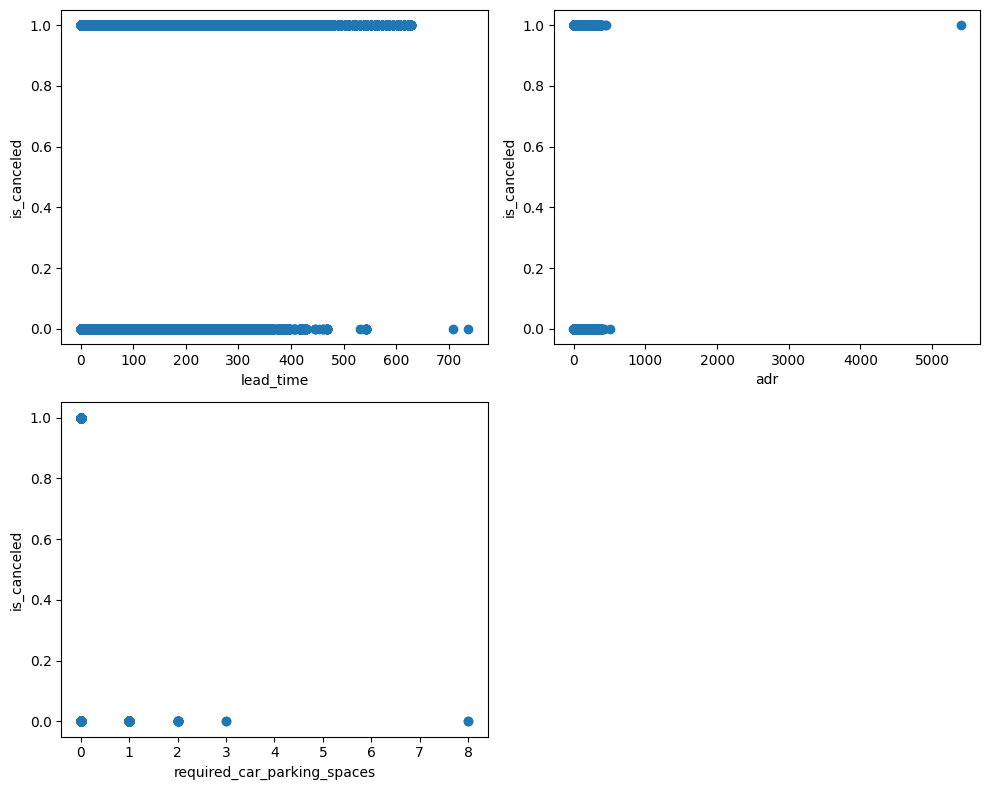

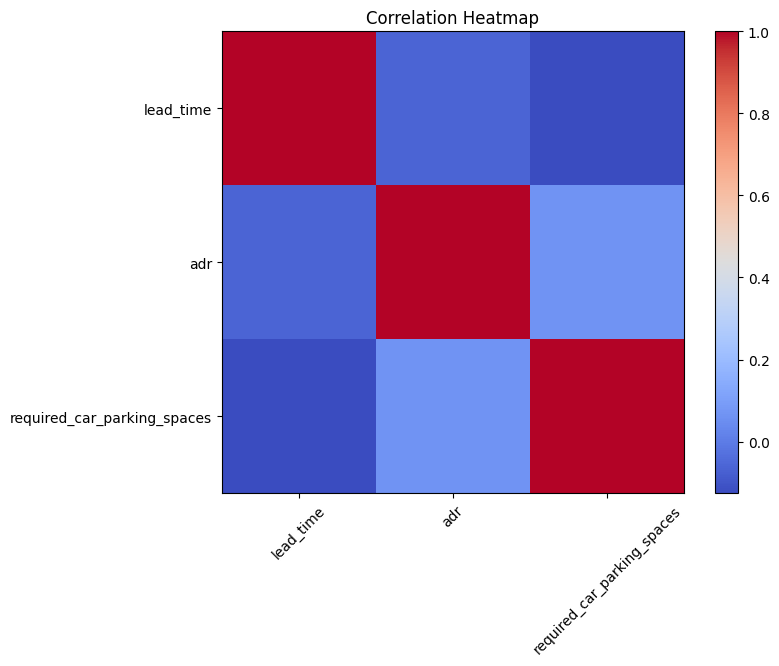

In [20]:
import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = ['lead_time', 'adr', 'required_car_parking_spaces']

# Scatter plots
plt.figure(figsize=(10, 8))
for i, column in enumerate(columns_of_interest):
  plt.subplot(2,2,i+1)
  plt.scatter(df[column],df['is_canceled'])
  plt.xlabel(column)
  plt.ylabel('is_canceled')
plt.tight_layout()
plt.show()


# Correlation heatmap
correlation_matrix = df[columns_of_interest].corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(columns_of_interest))
plt.xticks(tick_marks, columns_of_interest, rotation=45)
plt.yticks(tick_marks, columns_of_interest)
plt.title('Correlation Heatmap')
plt.show()